# Deep Learning in Virtual Screening: Recent Applications and Developments
## Review
See skeleton outline here:
https://docs.google.com/document/d/1KuKU_EHq9j5bYitJWemYmKid9lSvPWwx5vwE6a8vqJU/edit?usp=sharing

## Figure generation
This notebook serves to generate the figures for the review.

### Complex encoding
This complex figure is based on the crystal structure of ROCK 1 bound to fasudil.
- ROCK 1: ROCK1 is a protein serine/threonine kinase also known as rho-associated, coiled-coil-containing protein kinase 1, which plays a role in cancer.
- Fasudil: c1cc2cnccc2c(c1)S(=O)(=O)N3CCCNCC3

Link from here: https://www.rcsb.org/structure/2ESM

In [71]:
from pathlib import Path

import nglview as nv
from rdkit import Chem
import oddt.toolkits
from oddt.fingerprints import InteractionFingerprint
from oddt.fingerprints import SimpleInteractionFingerprint
from oddt.fingerprints import PLEC

HERE = Path(_dh[-1])
DATA = HERE / "data"

#### Show the structure of the protein and ligand.

In [72]:
pdb_id = "2esm"

In [73]:
# show the complex based on PDB ID
ngl_viewer = nv.show_pdbid(pdb_id)

In [74]:
# add the ligands
ngl_viewer.add_representation(repr_type="ball+stick",
                              selection="hetero and not water")

In [77]:
# center view on binding site
ngl_viewer.center("ligand")

In [78]:
# render a static image
ngl_viewer.render_image(trim=True, factor=2, transparent=True);

In [81]:
print('The structure of the complex between DOCK1 and fasudil:')
# ngl_viewer._display_image()
ngl_viewer

The structure of the complex between DOCK1 and fasudil:


NGLWidget(n_components=1)

In [24]:
# Canonical SMILES of ligand
fasudil = "c1cc2cnccc2c(c1)S(=O)(=O)N3CCCNCC3"

The structure of fasudil:


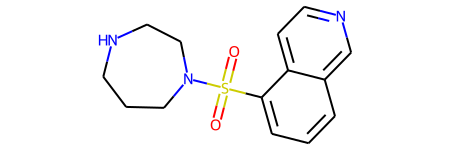

In [69]:
# Show the ligand
mol = Chem.MolFromSmiles(fasudil)
print('The structure of fasudil:')
mol

#### Show the interaction fingerprints
Link from here: https://oddt.readthedocs.io/en/latest/index.html?highlight=interaction%20fingerprint#interaction-fingerprints

In [13]:
ifps = InteractionFingerprint(ligand, protein)
sifp = SimpleInteractionFingerprint(ligand, protein)
plec = PLEC(ligand, protein, sparse=False)

In [35]:
# show the interaction fingerprint
print(ifps)

[0 0 0 ... 0 0 0]


In [20]:
# show the simple interaction fingerprint
print(sifp)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [34]:
# show the PLEC fingerprint
print(plec)

[0 0 0 ... 0 0 0]


#### Show the 3D grid
For detail of the drawgridbox method, please see [here](https://blog.csdn.net/u012325865/article/details/103495156). 

In [2]:
# run the pymol script to generate the image.
! pymol pymol_3d_grid_encoding.py

Cannot find license file.
 The license files (or license server system network addresses) attempted are 
listed below.  Use LM_LICENSE_FILE to use a different license file,
 or contact your software provider for a license file.
Feature:       PYMOL_MAIN
Filename:      /Library/Application Support/Schrodinger/licenses
License path:  /Library/Application Support/Schrodinger/licenses:
FlexNet Licensing error:-1,359.  System Error: 2 "No such file or directory"
 PyMOL(TM) 2.4.2 - Incentive Product
 Copyright (C) Schrodinger, LLC
 
 This Executable Build integrates and extends Open-Source PyMOL.
 Detected OpenGL version 2.1. Shaders available.
 Detected GLSL version 1.20.
 OpenGL graphics engine:
  GL_VENDOR:   Intel Inc.
  GL_RENDERER: Intel(R) Iris(TM) Plus Graphics 655
  GL_VERSION:  2.1 INTEL-12.10.25
No License File - For Evaluation Only (0 days remaining)
 Detected 8 CPU cores.  Enabled multithreaded rendering.
PyMOL>drawgridbox 20A, nx=10, ny=10, nz=10,  lw=0.5, g=0, b=0, r=0
Box dim

#### Show the graph encoding